Processing .art/tic-tac-toe-local/models/009
Processing .art/tic-tac-toe-local/models/009/trajectories/train/0000.yaml
Processing .art/tic-tac-toe-local/models/009/trajectories/train/0001.yaml
Processing .art/tic-tac-toe-local/models/009/trajectories/train/0002.yaml
Processing .art/tic-tac-toe-local/models/009/trajectories/train/0003.yaml
Processing .art/tic-tac-toe-local/models/009/trajectories/train/0004.yaml
Processing .art/tic-tac-toe-local/models/009/trajectories/train/0005.yaml
Processing .art/tic-tac-toe-local/models/009/trajectories/train/0006.yaml
Processing .art/tic-tac-toe-local/models/009/trajectories/train/0007.yaml
Processing .art/tic-tac-toe-local/models/009/trajectories/train/0008.yaml
Processing .art/tic-tac-toe-local/models/009/trajectories/train/0009.yaml
Processing .art/tic-tac-toe-local/models/009/trajectories/train/0010.yaml
Processing .art/tic-tac-toe-local/models/009/trajectories/train/0011.yaml
Processing .art/tic-tac-toe-local/models/009/trajectories/train/001

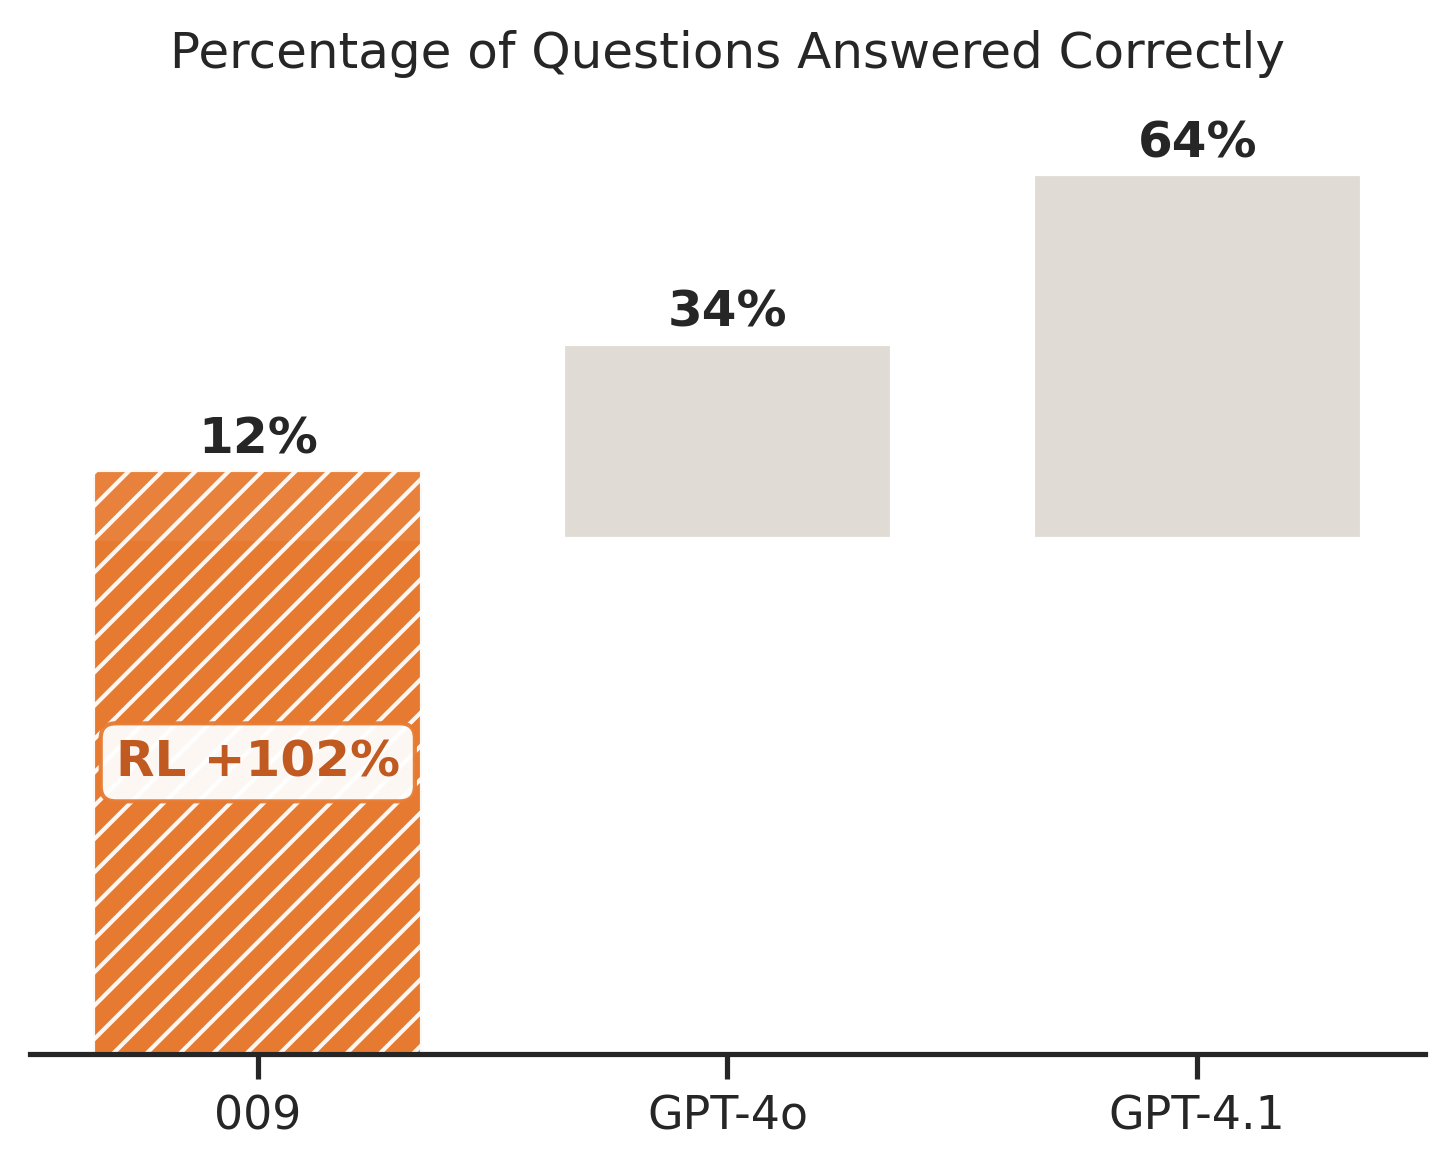

In [3]:
import importlib
import os

import polars as pl
from art.utils.benchmarking.load_trajectories import load_trajectories
from art.utils.benchmarking.charts import percentage_comparison_bar_chart, training_progress_chart
import art.utils.benchmarking.charts
from art.utils.benchmarking.types import BenchmarkModelKey
from art.utils.output_dirs import get_benchmarks_dir

importlib.reload(art.utils.benchmarking.charts)

project_name = "tic-tac-toe-local"

# await load_trajectories.bust_cache()
df = await load_trajectories(
    api_path="./.art",
    project_name=project_name,
    models=["009", "001-script", "gpt-4o", "gpt-4.1"],
    debug=True,
    # models=["gpt-4.1", "gemini-2.5-pro", "o4-mini", "o3", "email-agent-014"],
)  # type: ignore

print("df", df)


# Create the first chart (bar chart)
fig1 = percentage_comparison_bar_chart(
    df,
    metric_name="reward",
    models=[
        BenchmarkModelKey("009", "009", "train"),
        BenchmarkModelKey("001-script", "001-script", "train"),
        BenchmarkModelKey("gpt-4o", "GPT-4o"),
        BenchmarkModelKey("gpt-4.1", "GPT-4.1"),
        # ("gemini-2.5-pro", "Gemini\n2.5 Pro"),
        # # ("gemini-2.0-flash", "Gemini\n2.0 Flash"),
        # ("o4-mini", "o4-mini"),
        # "o3",
        # ("email-agent-008", "ART·E\n(Qwen 2.5 14B)"),
    ],
    title="Percentage of Questions Answered Correctly",
)



benchmarks_dir = get_benchmarks_dir(project=project_name, path="./.art")

os.makedirs(benchmarks_dir, exist_ok=True)

fig1.savefig(
    # "/Users/kyle/proj/openpipe-web/public/blog-images/art-e-accuracy-comparison.svg"
    f"{benchmarks_dir}/accuracy-comparison.svg"
)


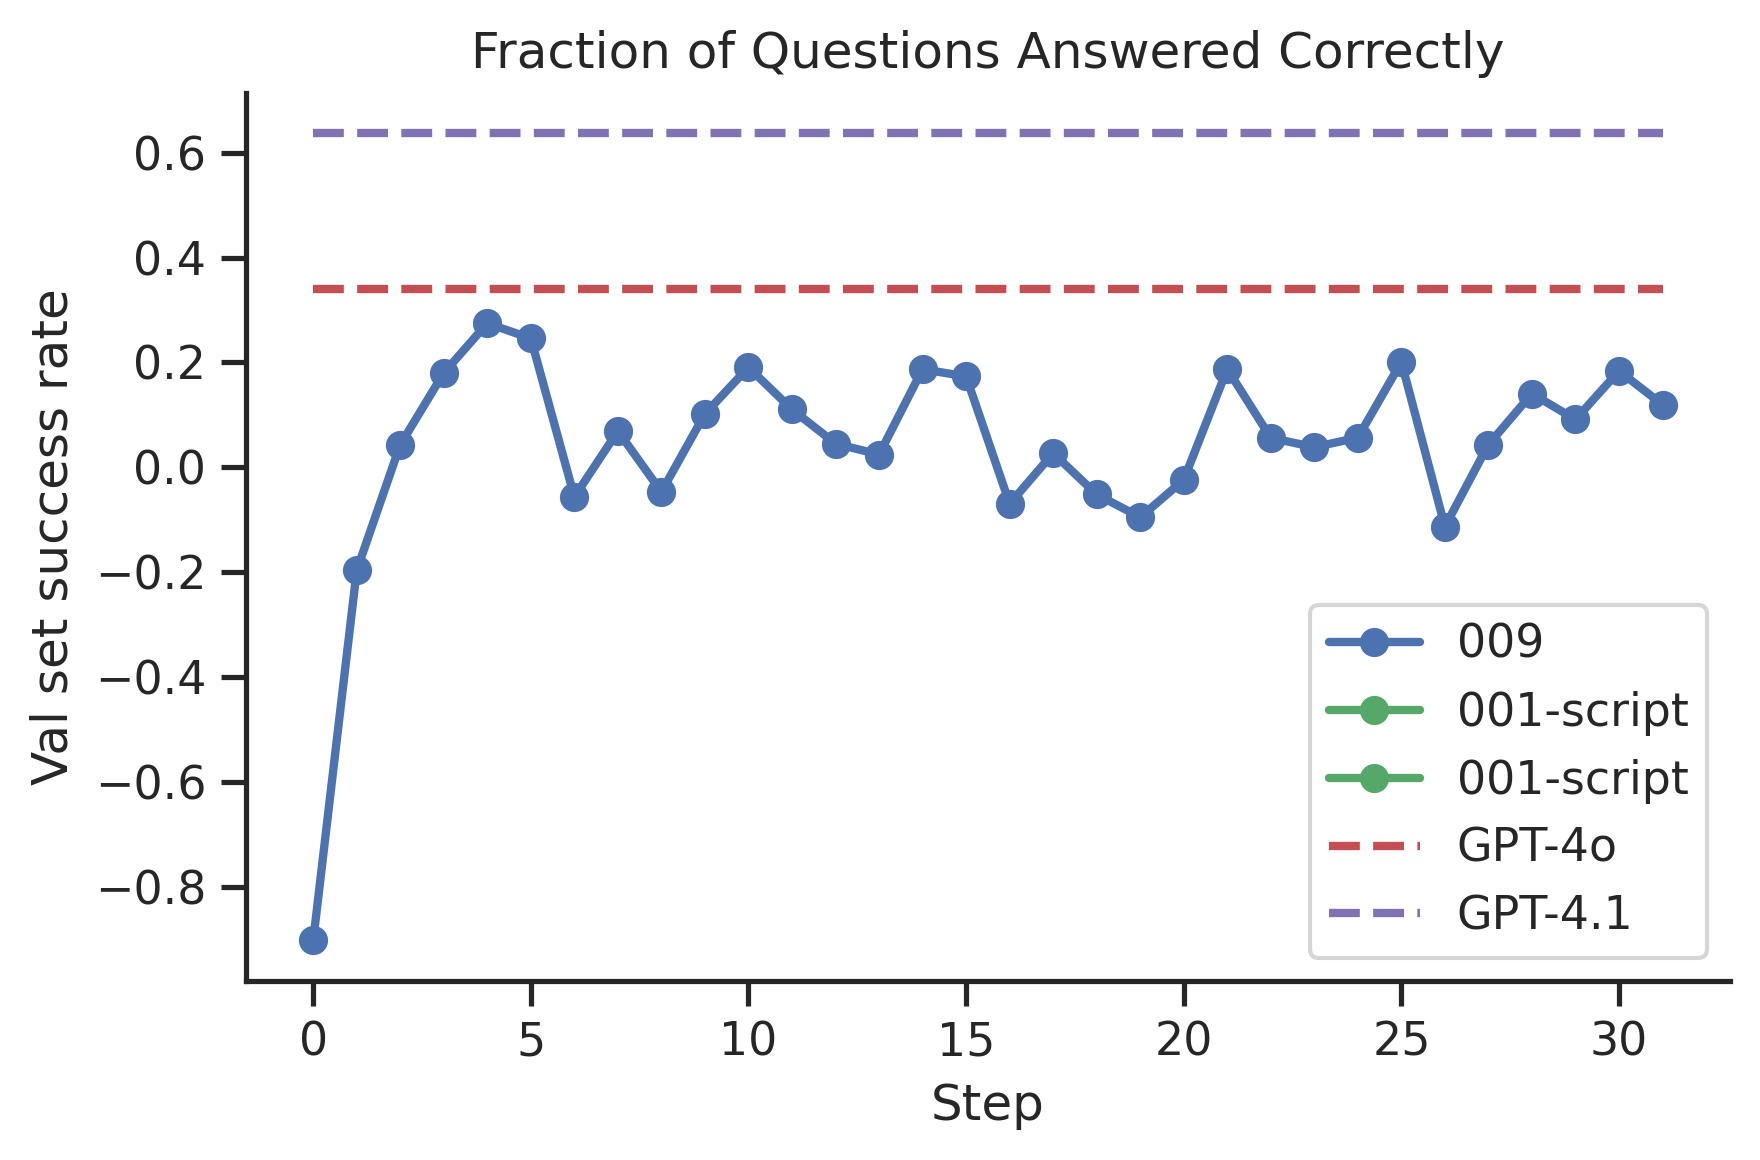

In [4]:
# Create the second chart (line chart)
fig2 = training_progress_chart(
    df.filter(pl.col("step").ne(592)),
    "reward",
    models=[
        BenchmarkModelKey("009", "009", "train"),
        BenchmarkModelKey("001-script", "001-script", "train"),
        BenchmarkModelKey("gpt-4o", "GPT-4o"),
        BenchmarkModelKey("gpt-4.1", "GPT-4.1"),
    ],
    title="Fraction of Questions Answered Correctly",
    y_label="Val set success rate",
)
# Save the second chart using the helper
fig2.savefig(
    # "/Users/kyle/proj/openpipe-web/public/blog-images/art-e-accuracy-training-progress.svg"
    f"{benchmarks_dir}/accuracy-training-progress.svg"
)
